<a href="https://colab.research.google.com/github/whis24virus/tradingBot/blob/main/tradebot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing dependencises

In [ ]:
!pip install tensorflow-gpu tensorflow  stable-baselines3[extra]
!pip install gym-anytrading gym

In [44]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import DQN 
from stable_baselines3 import A2C
from stable_baselines3 import DDPG 
from stable_baselines3 import PPO 

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [45]:
#importing market data bitcoin

In [46]:
df = pd.read_csv('data/bitcoin.csv')

In [47]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-23,2191.560059,2320.820068,2178.500000,2320.419922,2320.419922,1378749952
1,2017-05-24,2321.370117,2523.719971,2321.370117,2443.639893,2443.639893,1725379968
2,2017-05-25,2446.239990,2763.709961,2285.300049,2304.979980,2304.979980,2406700032
3,2017-05-26,2320.889893,2573.790039,2071.989990,2202.419922,2202.419922,1763480064
4,2017-05-27,2196.270020,2260.199951,1855.829956,2038.869995,2038.869995,1700480000


In [48]:
#sorting values based on date
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [49]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-23,2191.560059,2320.820068,2178.500000,2320.419922,2320.419922,1378749952
1,2017-05-24,2321.370117,2523.719971,2321.370117,2443.639893,2443.639893,1725379968
2,2017-05-25,2446.239990,2763.709961,2285.300049,2304.979980,2304.979980,2406700032
3,2017-05-26,2320.889893,2573.790039,2071.989990,2202.419922,2202.419922,1763480064
4,2017-05-27,2196.270020,2260.199951,1855.829956,2038.869995,2038.869995,1700480000


In [50]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-23,2191.560059,2320.820068,2178.500000,2320.419922,2320.419922,1378749952
2017-05-24,2321.370117,2523.719971,2321.370117,2443.639893,2443.639893,1725379968
2017-05-25,2446.239990,2763.709961,2285.300049,2304.979980,2304.979980,2406700032
2017-05-26,2320.889893,2573.790039,2071.989990,2202.419922,2202.419922,1763480064
2017-05-27,2196.270020,2260.199951,1855.829956,2038.869995,2038.869995,1700480000


In [56]:
env = gym.make('stocks-v0', df=df, frame_bound=(30,500), window_size=30)

In [ ]:
env.signal_features

In [58]:
#building and testign evironment

In [59]:
env.action_space

Discrete(2)

info {'total_reward': -5454.326045000006, 'total_profit': 0.12395198932455037, 'position': 1}


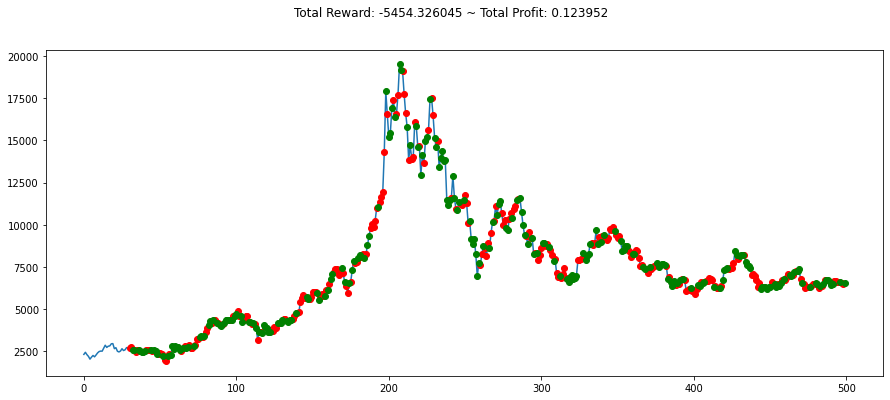

In [60]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [61]:
#adding custom indicators

In [62]:
#installing and importing dependencies
!pip install finta

In [16]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [17]:
#fix volume column

In [63]:
df['Volume'] = df['Volume'].apply(lambda x: float(str(x).replace(",", "")))

In [64]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [ ]:
#calculate sma, rsi, obv

In [65]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [66]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2017-05-23,2191.560059,2320.820068,2178.500000,2320.419922,2320.419922,1.378750e+09,0.000000,0.000000,0.000000e+00
2017-05-24,2321.370117,2523.719971,2321.370117,2443.639893,2443.639893,1.725380e+09,0.000000,100.000000,1.725380e+09
2017-05-25,2446.239990,2763.709961,2285.300049,2304.979980,2304.979980,2.406700e+09,0.000000,45.210701,-6.813201e+08
2017-05-26,2320.889893,2573.790039,2071.989990,2202.419922,2202.419922,1.763480e+09,0.000000,31.474501,-2.444800e+09
2017-05-27,2196.270020,2260.199951,1855.829956,2038.869995,2038.869995,1.700480e+09,0.000000,20.682774,-4.145280e+09
2017-05-28,2054.080078,2267.340088,2054.080078,2155.800049,2155.800049,1.147140e+09,0.000000,37.248687,-2.998140e+09
2017-05-29,2159.429932,2307.050049,2107.169922,2255.610107,2255.610107,9.946250e+08,0.000000,47.355881,-2.003515e+09
2017-05-30,2255.360107,2301.959961,2124.570068,2175.469971,2175.469971,1.443970e+09,0.000000,41.566739,-3.447485e+09
2017-05-31,2187.189941,2311.080078,2145.570068,2286.409912,2286.409912,1.544830e+09,0.000000,50.574448,-1.902655e+09


In [ ]:
#create new enviornment

In [93]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [94]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=10, frame_bound=(10,500))

In [95]:
env2.signal_features

array([[ 2.17850000e+03,  1.37874995e+09,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 2.32137012e+03,  1.72537997e+09,  0.00000000e+00,
         1.00000000e+02,  1.72537997e+09],
       [ 2.28530005e+03,  2.40670003e+09,  0.00000000e+00,
         4.52107009e+01, -6.81320064e+08],
       ...,
       [ 6.53789990e+03,  3.97926000e+09,  6.61654671e+03,
         4.81769973e+01,  1.62014263e+11],
       [ 6.45402978e+03,  3.88731000e+09,  6.59718335e+03,
         4.59632970e+01,  1.58126953e+11],
       [ 6.49791016e+03,  3.83841000e+09,  6.58507585e+03,
         4.94286694e+01,  1.61965363e+11]])

In [96]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2017-05-23,2191.560059,2320.820068,2178.500000,2320.419922,2320.419922,1.378750e+09,0.0,0.000000,0.000000e+00
2017-05-24,2321.370117,2523.719971,2321.370117,2443.639893,2443.639893,1.725380e+09,0.0,100.000000,1.725380e+09
2017-05-25,2446.239990,2763.709961,2285.300049,2304.979980,2304.979980,2.406700e+09,0.0,45.210701,-6.813201e+08
2017-05-26,2320.889893,2573.790039,2071.989990,2202.419922,2202.419922,1.763480e+09,0.0,31.474501,-2.444800e+09
2017-05-27,2196.270020,2260.199951,1855.829956,2038.869995,2038.869995,1.700480e+09,0.0,20.682774,-4.145280e+09


In [ ]:
#building and traning enviornment

In [109]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

# ***A2C***

In [100]:
#a2c traning
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Streaming output truncated to the last 5000 lines.
|    value_loss         | 300       |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 636       |
|    iterations         | 164400    |
|    time_elapsed       | 1291      |
|    total_timesteps    | 822000    |
| train/                |           |
|    entropy_loss       | -0.00059  |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 164399    |
|    policy_loss        | -0.000677 |
|    value_loss         | 44.2      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 636       |
|    iterations         | 164500    |
|    time_elapsed       | 1292      |
|    total_timesteps    | 822500    |
| train/                |           |
|    entropy_loss       | -0.000276 |
|    explained_variance | -88.3     |

***DQN***

In [106]:
#dqn traning
model = DQN('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Streaming output truncated to the last 5000 lines.
|    fps              | 1246     |
|    time_elapsed     | 199      |
|    total_timesteps  | 248412   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.23e+08 |
|    n_updates        | 49602    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 512      |
|    fps              | 1244     |
|    time_elapsed     | 201      |
|    total_timesteps  | 250368   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.67e+08 |
|    n_updates        | 50091    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 516      |
|    fps              | 1242     |
|   

***PPO***

In [110]:
#ppo training
model = PPO('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Streaming output truncated to the last 5000 lines.
|    time_elapsed         | 540           |
|    total_timesteps      | 434176        |
| train/                  |               |
|    approx_kl            | 0.00044600933 |
|    clip_fraction        | 9.77e-05      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0985       |
|    explained_variance   | 0.127         |
|    learning_rate        | 0.0003        |
|    loss                 | 1.14e+06      |
|    n_updates            | 2110          |
|    policy_gradient_loss | -0.00066      |
|    value_loss           | 1.56e+06      |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 803           |
|    iterations           | 213           |
|    time_elapsed         | 543           |
|    total_timesteps      | 436224        |
| train/                  |               |
|    approx_kl           

In [ ]:
#evaluation of models

In [111]:
env = MyCustomEnv(df=df, window_size=10, frame_bound=(500,1500))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 871.7075190000014, 'total_profit': 3.806810278839926, 'position': 1}


DQN ***PLOT***

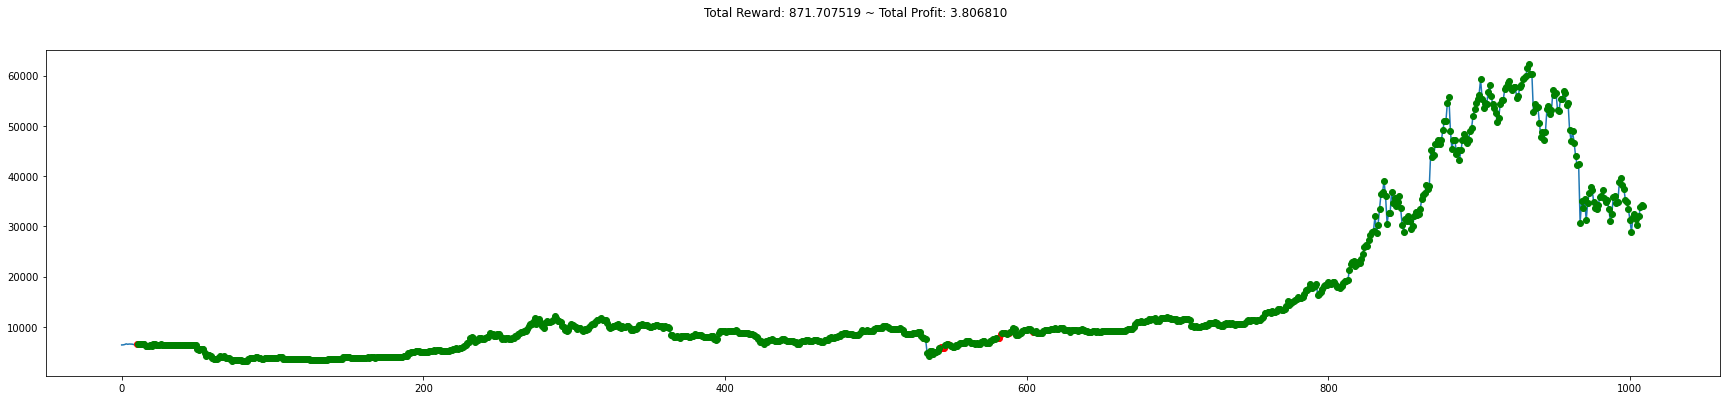

In [112]:
#DQN
plt.figure(figsize=(30,6))
plt.cla()
env.render_all()
plt.show()

PPO ***PLOT***

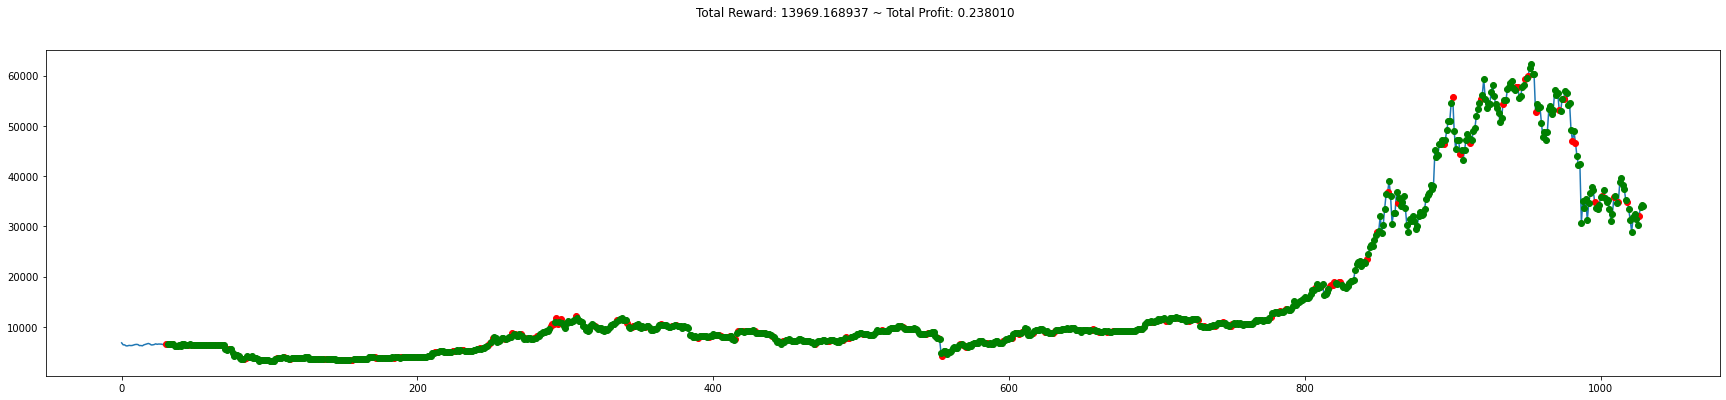

In [92]:
#PPO
plt.figure(figsize=(30,6))
plt.cla()
env.render_all()
plt.show()

***A2C PLOT***

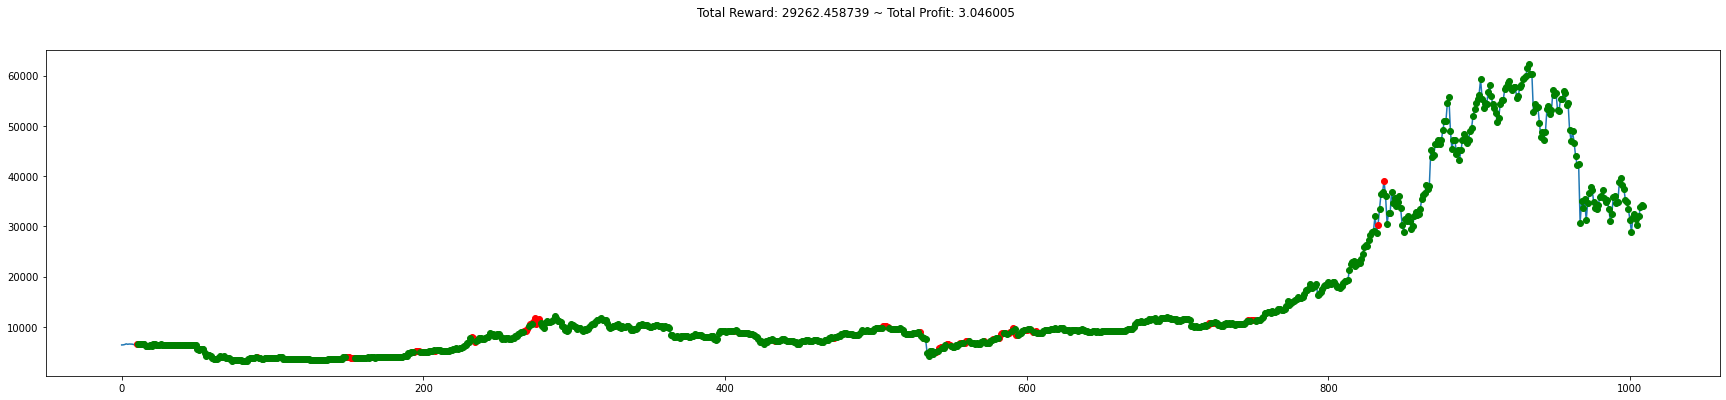

In [103]:
#ac2
plt.figure(figsize=(30,6))
plt.cla()
env.render_all()
plt.show()

In [30]:
len(df)

1827